**Student Performance Classifier (Classification Project)**

***Problem Statemen:-***

Predict whether a student will PASS (1) or FAIL (0) based on:

Study Hours

Attendance

Previous Score

*Using Logistic Regression

1.Import Libraries

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

2.Data set

In [70]:
data = {
    "Study_Hours": [1,2,3,4,5,6,7,8,9,10],
    "Attendance": [50,55,60,65,70,75,80,85,90,95],
    "Previous_Score": [35,40,45,50,55,60,65,70,75,80],
    "Pass": [0,0,0,0,0,1,1,1,1,1]
}

df = pd.DataFrame(data)
df


,Study_Hours,Attendance,Previous_Score,Pass
0,1,50,35,0
1,2,55,40,0
2,3,60,45,0
3,4,65,50,0
4,5,70,55,0
5,6,75,60,1
6,7,80,65,1
7,8,85,70,1
8,9,90,75,1
9,10,95,80,1


3.Split Features and target

In [71]:
x = df.drop("Pass",axis=1)
y = df["Pass"]

4.Train_test_split

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

5.Feature Scalling

In [73]:
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

6.Train Classification Model

In [74]:
model = LogisticRegression()
model.fit(x_train_scaler,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

7.Prediction

In [75]:
y_pred = model.predict(x_test_scaler)
print("Prediction:",y_pred)

Prediction: [1 0 0]


8.Model Evaluation

In [76]:
acc=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print("Accuracy :",acc)
print("Confusion Matrix:\n",cm)

Accuracy : 0.6666666666666666
Confusion Matrix:
 [[1 0]
 [1 1]]


In [77]:
new_student = pd.DataFrame({"Study_Hours":[6],
                            "Attendance":[78],
                            "Previous_Score" : [62]})    #Study_Hours,Attendance,Previous_Score
new_student_scaler = scaler.transform(new_student)
results = model.predict(new_student_scaler)
probability = model.predict_proba(new_student_scaler)
print("Prediction (0=Fail, 1=Pass):",results)
print("Probability:",probability)

Prediction (0=Fail, 1=Pass): [1]
Probability: [[0.4596866 0.5403134]]


10.Visualization

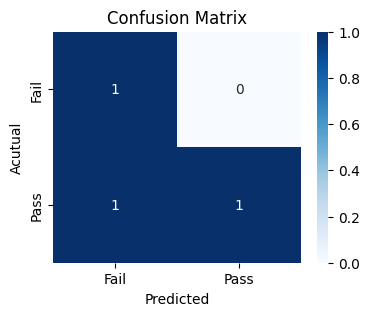

In [78]:
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",
            xticklabels=["Fail","Pass"],yticklabels=["Fail","Pass"])
plt.xlabel("Predicted")
plt.ylabel("Acutual")
plt.title("Confusion Matrix")
plt.show()

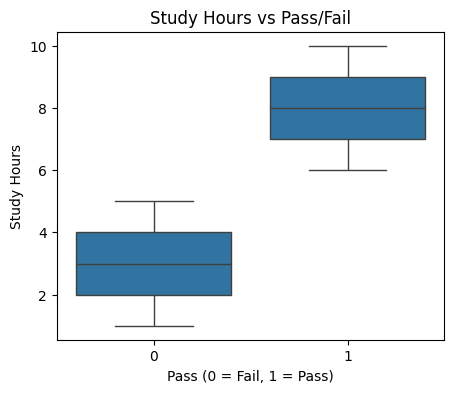

In [79]:
plt.figure(figsize=(5,4))
sns.boxplot(x=y, y=x["Study_Hours"])
plt.xlabel("Pass (0 = Fail, 1 = Pass)")
plt.ylabel("Study Hours")
plt.title("Study Hours vs Pass/Fail")
plt.show()


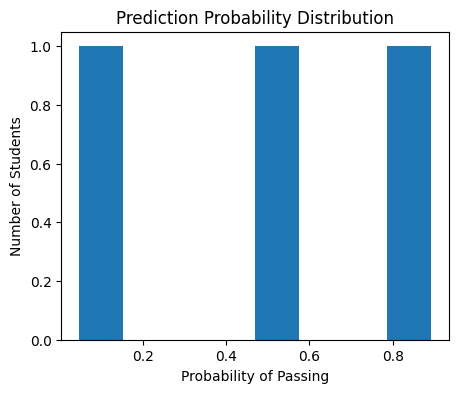

In [80]:
probs = model.predict_proba(x_test_scaler)[:,1]

plt.figure(figsize=(5,4))
plt.hist(probs, bins=8)
plt.xlabel("Probability of Passing")
plt.ylabel("Number of Students")
plt.title("Prediction Probability Distribution")
plt.show()


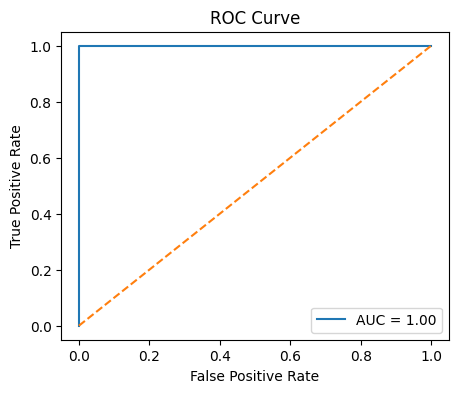

In [81]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
